遗传算法解决TSP问题

In [212]:
import pandas as pd;
import numpy as np;
import random;
import math;
import matplotlib.pyplot as plt;
import time;

In [213]:
#基因序列类
class geneCode(object):
    def __init__(self, code = None):
        self.gene = code;
        self.ada_val = -1;
        
#遗传算法类
class GA(object):
    def __init__(self, indiCount, aCrossRate, aChangeRate, codeLength, Fun):
        self.group = [];
        self.best = None;
        self.groupCnt = indiCount;
        self.generation = 1;
        self.crossRate = aCrossRate;
        self.changeRate = aChangeRate;
        self.crossCnt = 0;
        self.changeCnt = 0;
        self.num_city = codeLength;
        self.match = Fun;
        self.sum_ada = 0.0;
        self.initGroup();
         
    def initGroup(self):
        self.group = [];
        for i in range(self.groupCnt):
            gene = list(range(self.num_city));
            random.shuffle(gene);
            indi = geneCode(gene);
            self.group.append(indi);
 
    def cross(self, parent1, parent2):
        index1 = random.randint(0, self.num_city - 1)
        index2 = random.randint(index1, self.num_city - 1)
        tempGene = parent2.gene[index1:index2]                  
        newGene = []
        p1len = 0
        for g in parent1.gene:
            if p1len == index1:
                newGene.extend(tempGene)                        
                p1len += 1
            if g not in tempGene:
                newGene.append(g)
                p1len += 1
        self.crossCnt += 1
        return newGene 
 
    def change(self, gene):
        index1 = random.randint(0, self.num_city - 1)
        index2 = random.randint(0, self.num_city - 1)
        gene[index1], gene[index2] = gene[index2], gene[index1]
        self.changeCnt += 1
        return gene

    #估算个体的适应度
    def eval(self):
        self.sum_ada = 0.0;
        self.best = self.group[0];
        for i in self.group:
            i.ada_val = self.match(i);
            self.sum_ada += i.ada_val;
            if self.best.ada_val < i.ada_val:
                self.best = i;
 
    def choose(self):
        r = random.uniform(0, self.sum_ada)
        for i in self.group:
            r -= i.ada_val;
            if r <= 0:
                return i;
 
    def child(self):
        parent1 = self.choose();
        rate = random.random();
        #按概率交叉
        if rate < self.crossRate:
            parent2 = self.choose();
            gene = self.cross(parent1, parent2);
        else:
            gene = parent1.gene; 
        #按概率突变
        rate = random.random();
        if rate < self.changeRate:
            gene = self.change(gene);
        return geneCode(gene);
 
    def nextGeneration(self):
        self.eval();
        newGroup = [];
        newGroup.append(self.best);
        while len(newGroup) < self.groupCnt:
            newGroup.append(self.child());
        self.group = newGroup;
        self.generation += 1;

In [218]:
class TSP(object):
    def __init__(self, aLifeCount = 100, N = 10):
        self.read_data(N);
        self.groupCount = aLifeCount;
        self.ga = GA(indiCount = self.groupCount, aCrossRate = 0.8, 
                     aChangeRate = 0.01, codeLength = len(self.cities), Fun = self.match());
 
    def read_data(self, n):
        self.cities = [];
        if(n == 10):
            f=open('TSP10cities.tsp', 'r');
        if(n == 100):
            f=open('TSP100cities.tsp', 'r');
        while True:
            x = str(f.readline());
            if not x:
                break;
            x = x.replace("\n", "");
            x = x.split();
            self.cities.append((float(x[1]),float(x[2]),x[0]));
 
    def distance(self, order):
        total_dist = 0.0;
        for i in range(-1, len(self.cities) - 1):
            index1, index2 = order[i], order[i + 1];
            city1, city2 = self.cities[index1], self.cities[index2];
            total_dist += math.sqrt(pow((city1[0] - city2[0]), 2) + pow((city1[1] - city2[1]), 2));
        return total_dist;
 
    def match(self):
        return lambda x: 1.0 / self.distance(x.gene);
 
    def run(self, iter_num = 0):
        for i in range(iter_num):
            self.ga.nextGeneration();
            distance = self.distance(self.ga.best.gene);
            if( (dist_record) and (distance == dist_record[-1]) ):
                end = time.clock();
            iter_record.append(i + 1);
            dist_record.append(distance);
        print("经过%d次迭代，获得的总距离为：%f"%(self.ga.generation, distance))
        print("到收敛时经过时间为：%s" % (end - start));
        print("遍历城市顺序为：")
        for i in self.ga.best.gene:
            print(self.cities[i][2], end = "->"),


问题规模为n = 10

In [223]:
iter_record = [];
dist_record = [];
start = time.clock();
x = TSP(N = 10);
x.run(1000);

经过1001次迭代，获得的总距离为：10127.552144
到收敛时经过时间为：2.1557441538448074
遍历城市顺序为：
9->6->3->4->2->8->7->5->1->10->

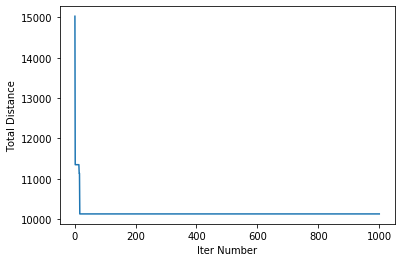

In [204]:
plt.plot(iter_record, dist_record);
plt.xlabel("Iter Number");
plt.ylabel("Total Distance");

问题规模为n = 100

In [221]:
iter_record = [];
dist_record = [];
start = time.clock();
x = TSP(N = 100);
x.run(1000);

经过1001次迭代，获得的总距离为：105731.496890
到收敛时经过时间为：12.269688569149821
遍历城市顺序为：
44->1->81->9->19->18->22->26->32->29->46->8->25->35->54->33->39->50->36->13->15->58->60->61->53->12->70->56->48->38->64->24->62->17->34->89->42->41->7->91->37->31->30->49->65->45->68->66->79->67->52->74->69->96->16->14->23->59->6->40->76->10->43->11->20->97->4->21->57->75->63->88->47->71->72->99->82->86->95->90->55->5->87->92->85->84->27->80->100->73->93->98->94->28->2->78->77->51->3->83->

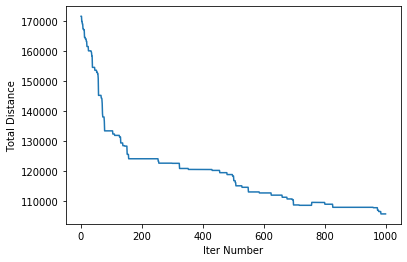

In [222]:
plt.plot(iter_record, dist_record);
plt.xlabel("Iter Number");
plt.ylabel("Total Distance");